In [2]:
# import sys 
# sys.path.append("..")


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx 
import nxviz as nv

from Leviathan.Island import Island
from Leviathan.Member import Member
from Leviathan.Analyzer import Analyzer
from time import time
from Leviathan.Land import Land
from utils import save
import os

/var/folders/yt/3k3ggbjn7tx8fw7yp_fvf6sh0000gn/T/ipykernel_14179/2915504201.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/lichenyu/miniconda3/envs/python310/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericm

In [3]:
rng = np.random.default_rng()
path = save.datetime_dir("../data")
island = Island(30, (10, 10), path, 2023)
Island._RECORD_PERIOD = 1
# island = Island.load_from_pickle("data/Nov/15_13-23/180.pkl")

Current save directory: ../data/Mar/11_21-11/


In [4]:
island = Island.load_from_pickle('/Users/lichenyu/leviathan/Leviathan/365.pkl')


In [8]:
island.current_members[0].parameter_dict

{'attack': array([-0.04469705,  1.06627925,  0.7772625 ,  0.24208184, -0.01240011,
        -0.04642445, -0.95496697,  0.34297055,  0.73901766, -0.99977033,
        -0.96640741, -0.69020096,  0.57689448,  0.27081482, -0.21154566,
        -0.3459329 ,  0.00112754, -0.05363091,  0.24382892]),
 'offer': array([ 9.05484520e-01,  1.37346897e-01,  4.77020156e-01,  3.43923062e-01,
         6.57131128e-05, -7.81898656e-01, -2.16121243e-02, -6.46866760e-01,
         1.96682899e-01, -6.39855117e-01,  9.30307709e-01,  8.60038899e-02,
         9.27635543e-02, -4.75860575e-01,  6.44030919e-01,  6.50357467e-01,
        -8.15136306e-02,  1.50482503e-01,  7.58942724e-01]),
 'reproduce': array([ 0.57600619,  0.09673087,  0.41797803,  0.08440345, -0.47882378,
         0.02888182,  0.35886188,  0.94918927, -0.18913885,  1.24679661,
         0.67207538,  0.61607303,  0.42540134,  0.03485231, -0.48909539,
        -0.20787986,  0.40890352,  0.93058354,  0.1682248 ]),
 'clear': array([ 0.19136855,  0.13399758

In [6]:
parameter_dict_list = []

for member in island.all_members[-1000:]:
    parameter_dict_list.append(member.parameter_dict)


In [7]:
parameter_dict_list

[{'attack': array([ 0.75842834,  0.95818639,  0.46142778, -0.28425809,  0.44426547,
         -0.56206235, -0.95380724,  0.76763987,  0.27228167, -1.10884256,
         -0.77539613, -0.61834389,  0.38114301,  0.10744832, -0.28467445,
         -0.41049579, -0.30786692, -1.24821448, -0.10042903]),
  'offer': array([ 0.29137139,  0.82175449,  0.6672875 , -0.20666811,  0.42020334,
         -0.64527381, -0.06674886, -0.4950393 ,  0.43729831, -0.88587714,
          0.34367866, -0.12824134,  1.04612557, -0.46938897, -0.04756911,
          0.42979963, -0.11940505,  0.6806783 , -0.24001334]),
  'reproduce': array([ 0.91956541,  0.74874316,  0.20415991, -0.48439245,  0.07949884,
          0.62853363,  0.03295157,  0.6716808 ,  0.34287977,  0.58703057,
          0.15263348,  0.18526348,  0.3446216 , -0.73507376, -0.45880843,
          1.35547319,  1.14367441,  0.38230908, -0.05571833]),
  'clear': array([ 0.16918037, -0.2550234 , -0.07182719, -0.11358826, -0.01315937,
          0.06984303,  0.38398

In [8]:
parameter_array = np.array([list(param_dict.values()) for param_dict in parameter_dict_list])
print(parameter_array.shape)
monster_array = np.concatenate(np.transpose(parameter_array, axes = [1,0,2]), axis=1)
monster_array.shape


(1000, 5, 19)


(1000, 95)

In [9]:
parameter_array = monster_array

In [13]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(parameter_array)

# Print the cluster labels
print(clusters.cluster_centers_)

# # Calculate the within-cluster sum of squares (WCSS) for different values of k
# wcss = []
# for k in range(1, 50):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(parameter_array)
#     wcss.append(kmeans.inertia_)

# # Plot the WCSS against k
# plt.plot(range(1, 50), wcss)
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.title('Elbow Method')
# plt.show()


/Users/lichenyu/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[-1.11199891e-01  9.42803697e-01  8.50855199e-01  1.31865481e-01
  -1.21145174e-01 -7.58741731e-02 -8.89839442e-01  2.39076408e-01
   1.57276016e-01 -7.76007504e-01 -9.51355149e-01  1.97308496e-01
  -8.54538630e-02  4.18272533e-01  1.62235864e-01 -6.15002094e-01
  -2.58216504e-01 -6.96708080e-01  8.11365570e-02  3.41573267e-01
   5.41216403e-01  5.23791549e-01 -2.65554067e-01  7.79418484e-01
  -8.67356665e-01 -5.30169967e-01 -9.34410288e-01  1.86048784e-01
  -6.03069939e-01  4.35053097e-01  4.05712631e-02  1.04077276e+00
  -3.46539646e-01  1.72966999e-01  8.35847726e-01 -1.34979824e-01
   4.94539908e-01  1.84839325e-01  5.57612511e-01  1.94414843e-01
   5.66797433e-01 -2.59165979e-01  2.00382642e-01  6.08237371e-01
   3.83743633e-01  4.42441960e-01 -7.86543990e-02  1.00365014e+00
   6.71878937e-01  4.90972036e-01  3.22873200e-01 -4.86734356e-01
  -7.82382797e-01  9.53464073e-01  6.72781717e-01  4.93920148e-01
   6.10901766e-01 -1.23551628e-01  1.07202135e-01 -1.60827184e-01
   1.05647

In [15]:
[i for i in range(0,4)]

[0, 1, 2, 3]

In [34]:
j = 2
label_ranking = np.argsort(clusters.cluster_centers_, axis=1)
param_label_list = ['attack_self_productivity', 'attack_self_vitality', 'attack_self_cargo', 'attack_self_age', 'attack_self_neighbor', 'attack_obj_productivity', 'attack_obj_vitality', 'attack_obj_cargo', 'attack_obj_age', 'attack_obj_neighbor', 'attack_victim_overlap', 'attack_benefit_overlap', 'attack_benefit_land_overlap', 'attack_victim_passive', 'attack_victim_active', 'attack_benefit_passive', 'attack_benefit_active', 'attack_benefit_land_passive', 'attack_benefit_land_active', 'offer_self_productivity', 'offer_self_vitality', 'offer_self_cargo', 'offer_self_age', 'offer_self_neighbor', 'offer_obj_productivity', 'offer_obj_vitality', 'offer_obj_cargo', 'offer_obj_age', 'offer_obj_neighbor', 'offer_victim_overlap', 'offer_benefit_overlap', 'offer_benefit_land_overlap', 'offer_victim_passive', 'offer_victim_active', 'offer_benefit_passive', 'offer_benefit_active', 'offer_benefit_land_passive', 'offer_benefit_land_active', 'reproduce_self_productivity', 'reproduce_self_vitality', 'reproduce_self_cargo', 'reproduce_self_age', 'reproduce_self_neighbor', 'reproduce_obj_productivity', 'reproduce_obj_vitality', 'reproduce_obj_cargo', 'reproduce_obj_age', 'reproduce_obj_neighbor', 'reproduce_victim_overlap', 'reproduce_benefit_overlap', 'reproduce_benefit_land_overlap', 'reproduce_victim_passive', 'reproduce_victim_active', 'reproduce_benefit_passive', 'reproduce_benefit_active', 'reproduce_benefit_land_passive', 'reproduce_benefit_land_active', 'clear_self_productivity', 'clear_self_vitality', 'clear_self_cargo', 'clear_self_age', 'clear_self_neighbor', 'clear_obj_productivity', 'clear_obj_vitality', 'clear_obj_cargo', 'clear_obj_age', 'clear_obj_neighbor', 'clear_victim_overlap', 'clear_benefit_overlap', 'clear_benefit_land_overlap', 'clear_victim_passive', 'clear_victim_active', 'clear_benefit_passive', 'clear_benefit_active', 'clear_benefit_land_passive', 'clear_benefit_land_active', 'offer_land_self_productivity', 'offer_land_self_vitality', 'offer_land_self_cargo', 'offer_land_self_age', 'offer_land_self_neighbor', 'offer_land_obj_productivity', 'offer_land_obj_vitality', 'offer_land_obj_cargo', 'offer_land_obj_age', 'offer_land_obj_neighbor', 'offer_land_victim_overlap', 'offer_land_benefit_overlap', 'offer_land_benefit_land_overlap', 'offer_land_victim_passive', 'offer_land_victim_active', 'offer_land_benefit_passive', 'offer_land_benefit_active', 'offer_land_benefit_land_passive', 'offer_land_benefit_land_active']
value_ranked = np.sort(clusters.cluster_centers_, axis=1)
ranked_param_label_list = [param_label_list[i] for i in label_ranking[j]]
list(zip(ranked_param_label_list, value_ranked[j]))

[('attack_benefit_land_passive', -0.861906736982497),
 ('attack_victim_overlap', -0.7691038191653571),
 ('attack_obj_neighbor', -0.7591837267388275),
 ('attack_obj_vitality', -0.716355145805749),
 ('reproduce_victim_active', -0.680126680102203),
 ('offer_obj_productivity', -0.6786550615265802),
 ('offer_land_victim_passive', -0.6401475868611425),
 ('offer_obj_cargo', -0.619008068864565),
 ('offer_land_obj_neighbor', -0.6159493180213343),
 ('offer_land_obj_productivity', -0.5602929147733517),
 ('offer_victim_passive', -0.5164634443138351),
 ('reproduce_victim_passive', -0.44473218278882015),
 ('offer_land_obj_cargo', -0.43163071198436587),
 ('offer_obj_neighbor', -0.4294637261548417),
 ('offer_obj_vitality', -0.4209659449365558),
 ('clear_victim_active', -0.37084166675917984),
 ('clear_victim_passive', -0.368207425936399),
 ('offer_land_obj_vitality', -0.3648002001714567),
 ('attack_benefit_passive', -0.3434523029328286),
 ('offer_land_victim_active', -0.3101026104207134),
 ('attack_ben

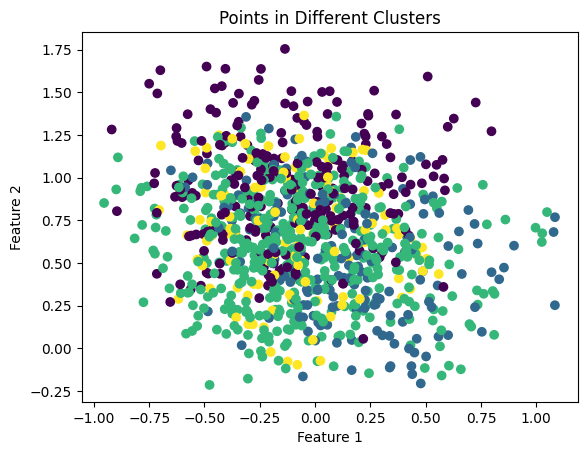

In [42]:
plt.scatter(parameter_array[:, 0], parameter_array[:, 1], c=clusters.labels_)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Points in Different Clusters')
plt.show()


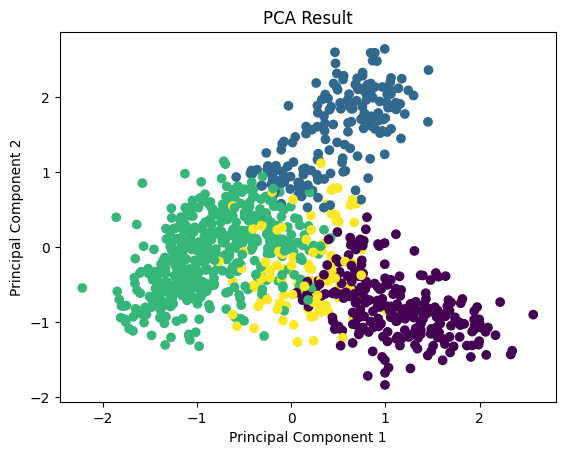

In [43]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(parameter_array)

# Plot the graph
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


In [18]:
pca_ranking = np.argsort(clusters.cluster_centers_, axis=1)
param_label_list = ['attack_self_productivity', 'attack_self_vitality', 'attack_self_cargo', 'attack_self_age', 'attack_self_neighbor', 'attack_obj_productivity', 'attack_obj_vitality', 'attack_obj_cargo', 'attack_obj_age', 'attack_obj_neighbor', 'attack_victim_overlap', 'attack_benefit_overlap', 'attack_benefit_land_overlap', 'attack_victim_passive', 'attack_victim_active', 'attack_benefit_passive', 'attack_benefit_active', 'attack_benefit_land_passive', 'attack_benefit_land_active', 'offer_self_productivity', 'offer_self_vitality', 'offer_self_cargo', 'offer_self_age', 'offer_self_neighbor', 'offer_obj_productivity', 'offer_obj_vitality', 'offer_obj_cargo', 'offer_obj_age', 'offer_obj_neighbor', 'offer_victim_overlap', 'offer_benefit_overlap', 'offer_benefit_land_overlap', 'offer_victim_passive', 'offer_victim_active', 'offer_benefit_passive', 'offer_benefit_active', 'offer_benefit_land_passive', 'offer_benefit_land_active', 'reproduce_self_productivity', 'reproduce_self_vitality', 'reproduce_self_cargo', 'reproduce_self_age', 'reproduce_self_neighbor', 'reproduce_obj_productivity', 'reproduce_obj_vitality', 'reproduce_obj_cargo', 'reproduce_obj_age', 'reproduce_obj_neighbor', 'reproduce_victim_overlap', 'reproduce_benefit_overlap', 'reproduce_benefit_land_overlap', 'reproduce_victim_passive', 'reproduce_victim_active', 'reproduce_benefit_passive', 'reproduce_benefit_active', 'reproduce_benefit_land_passive', 'reproduce_benefit_land_active', 'clear_self_productivity', 'clear_self_vitality', 'clear_self_cargo', 'clear_self_age', 'clear_self_neighbor', 'clear_obj_productivity', 'clear_obj_vitality', 'clear_obj_cargo', 'clear_obj_age', 'clear_obj_neighbor', 'clear_victim_overlap', 'clear_benefit_overlap', 'clear_benefit_land_overlap', 'clear_victim_passive', 'clear_victim_active', 'clear_benefit_passive', 'clear_benefit_active', 'clear_benefit_land_passive', 'clear_benefit_land_active', 'offer_land_self_productivity', 'offer_land_self_vitality', 'offer_land_self_cargo', 'offer_land_self_age', 'offer_land_self_neighbor', 'offer_land_obj_productivity', 'offer_land_obj_vitality', 'offer_land_obj_cargo', 'offer_land_obj_age', 'offer_land_obj_neighbor', 'offer_land_victim_overlap', 'offer_land_benefit_overlap', 'offer_land_benefit_land_overlap', 'offer_land_victim_passive', 'offer_land_victim_active', 'offer_land_benefit_passive', 'offer_land_benefit_active', 'offer_land_benefit_land_passive', 'offer_land_benefit_land_active']
ranked_param_label_list = [param_label_list[i] for i in pca_ranking[1]]
ranked_param_label_list[:10]

['attack_obj_neighbor',
 'offer_land_obj_productivity',
 'attack_obj_vitality',
 'offer_obj_vitality',
 'offer_land_obj_cargo',
 'offer_victim_passive',
 'attack_benefit_land_passive',
 'clear_victim_passive',
 'offer_obj_cargo',
 'reproduce_victim_active']

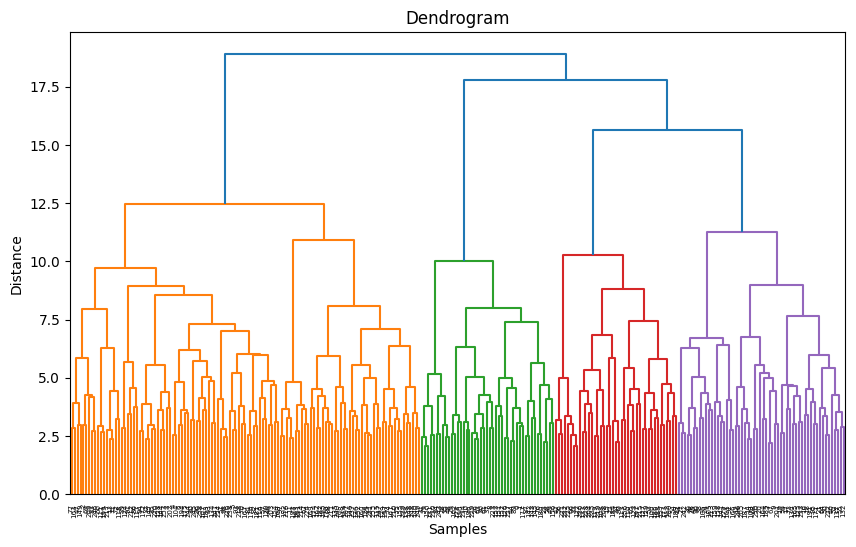

In [82]:
import scipy.cluster.hierarchy as sch

# Compute the linkage matrix
Z = sch.linkage(parameter_array, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

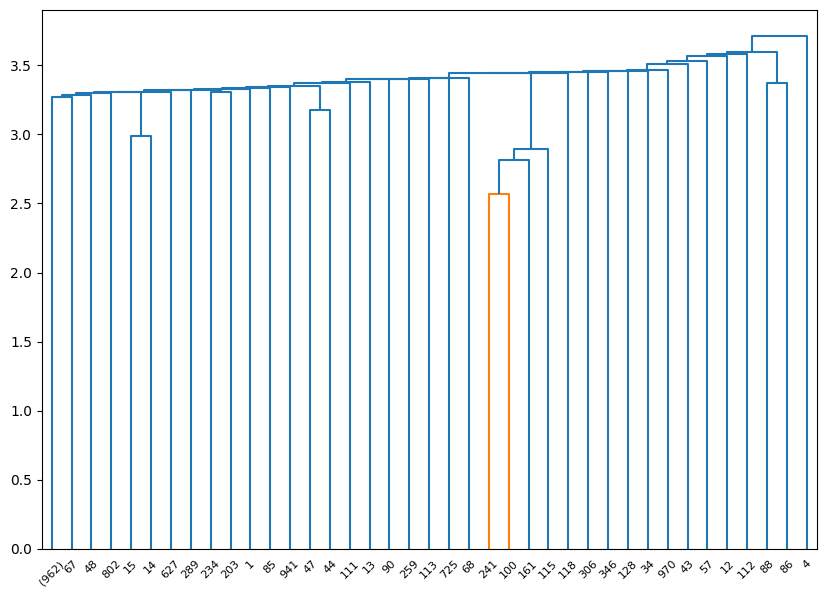

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(parameter_array, 'single')

labelList = range(1, parameter_array.shape[0] + 1)  # Update labelList to match the number of rows in the linkage matrix

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            truncate_mode='level')  # Set truncate_mode to 'level' to show fewer levels

plt.show() 

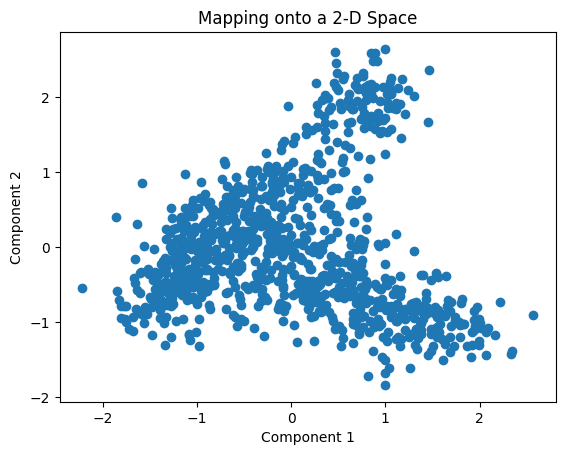

In [44]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(parameter_array)

# Plot the mapped data
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Mapping onto a 2-D Space')
plt.show()


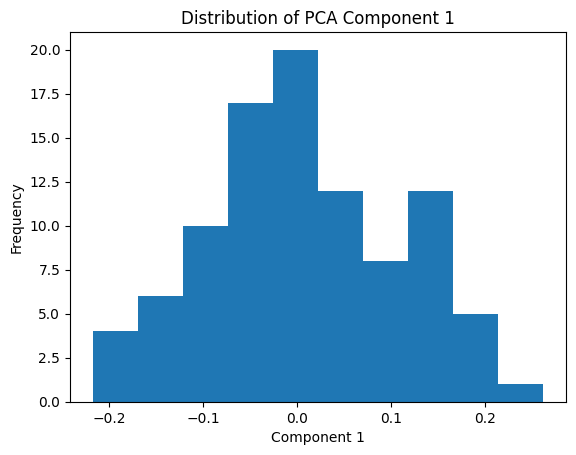

In [110]:
plt.hist(pca.components_[0])
plt.xlabel('Component 1')
plt.ylabel('Frequency')
plt.title('Distribution of PCA Component 1')
plt.show()


In [100]:
pca.components_[1]

array([-0.09412227,  0.00931863,  0.03802893, -0.08305763,  0.07171267,
       -0.02539071, -0.05666581,  0.07557486,  0.01821349, -0.00904208,
       -0.02951505, -0.27536241,  0.22398069, -0.26548174, -0.02155385,
        0.00925056,  0.05852219, -0.0268568 ,  0.01357808,  0.05261524,
       -0.06309987, -0.1454677 , -0.01447533, -0.06344597,  0.01472993,
        0.21288378,  0.0851793 ,  0.01182645,  0.08110126, -0.04209508,
        0.08705136, -0.12767837, -0.01318042,  0.04753146,  0.07326835,
        0.10400139, -0.07335977,  0.09996581, -0.04764129,  0.14582519,
       -0.16569278,  0.03920095, -0.21394044, -0.1317927 , -0.13553868,
        0.0466792 , -0.1015627 ,  0.14756799,  0.02139265,  0.12160612,
       -0.13556412, -0.03224081, -0.01192921, -0.28529572, -0.05552262,
        0.04137735, -0.03220493,  0.12516455,  0.04229802,  0.05077515,
       -0.03317869, -0.09922983, -0.03886121, -0.09282214, -0.04877359,
       -0.09243971,  0.09153014, -0.13106592, -0.00519749, -0.12

In [102]:
pca_ranking = np.argsort(pca.components_[0])

In [103]:
param_label_list = ['attack_self_productivity', 'attack_self_vitality', 'attack_self_cargo', 'attack_self_age', 'attack_self_neighbor', 'attack_obj_productivity', 'attack_obj_vitality', 'attack_obj_cargo', 'attack_obj_age', 'attack_obj_neighbor', 'attack_victim_overlap', 'attack_benefit_overlap', 'attack_benefit_land_overlap', 'attack_victim_passive', 'attack_victim_active', 'attack_benefit_passive', 'attack_benefit_active', 'attack_benefit_land_passive', 'attack_benefit_land_active', 'offer_self_productivity', 'offer_self_vitality', 'offer_self_cargo', 'offer_self_age', 'offer_self_neighbor', 'offer_obj_productivity', 'offer_obj_vitality', 'offer_obj_cargo', 'offer_obj_age', 'offer_obj_neighbor', 'offer_victim_overlap', 'offer_benefit_overlap', 'offer_benefit_land_overlap', 'offer_victim_passive', 'offer_victim_active', 'offer_benefit_passive', 'offer_benefit_active', 'offer_benefit_land_passive', 'offer_benefit_land_active', 'reproduce_self_productivity', 'reproduce_self_vitality', 'reproduce_self_cargo', 'reproduce_self_age', 'reproduce_self_neighbor', 'reproduce_obj_productivity', 'reproduce_obj_vitality', 'reproduce_obj_cargo', 'reproduce_obj_age', 'reproduce_obj_neighbor', 'reproduce_victim_overlap', 'reproduce_benefit_overlap', 'reproduce_benefit_land_overlap', 'reproduce_victim_passive', 'reproduce_victim_active', 'reproduce_benefit_passive', 'reproduce_benefit_active', 'reproduce_benefit_land_passive', 'reproduce_benefit_land_active', 'clear_self_productivity', 'clear_self_vitality', 'clear_self_cargo', 'clear_self_age', 'clear_self_neighbor', 'clear_obj_productivity', 'clear_obj_vitality', 'clear_obj_cargo', 'clear_obj_age', 'clear_obj_neighbor', 'clear_victim_overlap', 'clear_benefit_overlap', 'clear_benefit_land_overlap', 'clear_victim_passive', 'clear_victim_active', 'clear_benefit_passive', 'clear_benefit_active', 'clear_benefit_land_passive', 'clear_benefit_land_active', 'offer_land_self_productivity', 'offer_land_self_vitality', 'offer_land_self_cargo', 'offer_land_self_age', 'offer_land_self_neighbor', 'offer_land_obj_productivity', 'offer_land_obj_vitality', 'offer_land_obj_cargo', 'offer_land_obj_age', 'offer_land_obj_neighbor', 'offer_land_victim_overlap', 'offer_land_benefit_overlap', 'offer_land_benefit_land_overlap', 'offer_land_victim_passive', 'offer_land_victim_active', 'offer_land_benefit_passive', 'offer_land_benefit_active', 'offer_land_benefit_land_passive', 'offer_land_benefit_land_active']
ranked_param_label_list = [param_label_list[i] for i in pca_ranking]


In [109]:
island.current_members[2].parameter_dict['attack'][16]

-0.13568202067633606

In [107]:
param_label_list.index('attack_benefit_active')

16

In [94]:
ranked_param_label_list

['offer_land_self_cargo',
 'clear_obj_cargo',
 'attack_benefit_active',
 'clear_obj_vitality',
 'offer_benefit_land_passive',
 'offer_benefit_overlap',
 'offer_obj_cargo',
 'clear_benefit_land_overlap',
 'reproduce_benefit_active',
 'attack_benefit_passive',
 'reproduce_self_vitality',
 'attack_obj_cargo',
 'offer_land_obj_vitality',
 'reproduce_self_age',
 'reproduce_benefit_passive',
 'offer_self_vitality',
 'offer_land_obj_age',
 'reproduce_self_productivity',
 'clear_benefit_overlap',
 'offer_benefit_land_overlap',
 'offer_land_obj_neighbor',
 'offer_land_victim_passive',
 'offer_obj_productivity',
 'reproduce_victim_active',
 'clear_self_age',
 'offer_land_benefit_active',
 'clear_self_neighbor',
 'attack_benefit_land_active',
 'offer_land_self_age',
 'attack_obj_vitality',
 'clear_victim_passive',
 'clear_obj_neighbor',
 'attack_obj_neighbor',
 'attack_benefit_land_overlap',
 'offer_obj_neighbor',
 'offer_benefit_active',
 'reproduce_self_neighbor',
 'clear_victim_active',
 'atta

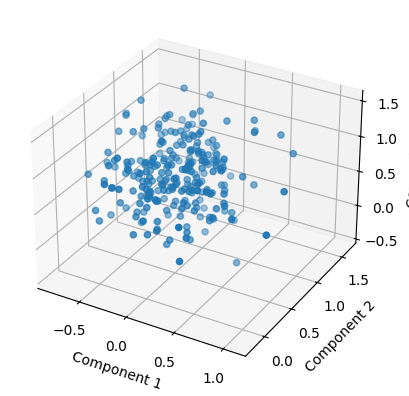

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(parameter_array[:, 0], parameter_array[:, 1], parameter_array[:, 2])
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()


In [21]:
island.decision_history[island.all_members[0]].update({1: (1, 0, 0), 2: (1, 0, 1)})


In [23]:
island.decision_history[island.all_members[0]]

(1, 0, 1)

In [18]:
path = save.datetime_dir("../data")
# path = dir+"test_run/"
# os.mkdir(path)
Island._RECORD_PERIOD = 10

Current save directory: ../data/Mar/10_15-25/


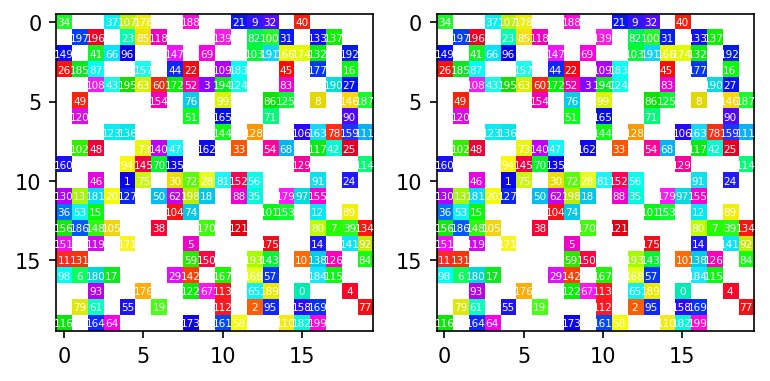

In [3]:
island.land.plot()

In [5]:
for i in range(20):
    island.new_round(record_path=path)
    island.trade()
    island.land_distribute()
    island.colonize()
    island.consume()
    island.fight()
    island.produce()
    island.reproduce()

    if island.is_dead:
        break


In [6]:
attack_record_list = island.record_historic_ratio_list[:,0]

q1 = np.percentile(attack_record_list, 25)
q2 = np.percentile(attack_record_list, 50)
q3 = np.percentile(attack_record_list, 75)
q4 = np.percentile(attack_record_list, 100)

q1, q2, q3, q4

(0.0, 0.0, 0.5687228351273481, 1.1374456702546962)

## Analyze

##################### 20 #####################
===================== 攻击 =====================
	Song(63) --25.6-> Taheerah(246)
	Song(63) --29.8-> Shanka(247)
	Drew(72) --30.8-> Alysse(70)
	Drew(72) --33.1-> Jerime(243)
	Drew(72) --35.5-> Mellisa(242)
	Drew(72) --20.2-> Edrick(224)
	Drew(72) --36.8-> Takecia(251)
	Anastassia(26) --22.2-> Shanka(247)
	Anastassia(26) --18.1-> Janiqua(225)
	Javonte(234) --34.8-> Teandra(71)
	Javonte(234) --42.7-> Jeneen(125)
	Chenoa(37) --15.8-> Jacqulene(79)
	Chenoa(37) --14.4-> Davian(178)
	Chenoa(37) --13.5-> Ashey(249)
	Shaneaka(161) --47.9-> Amjad(214)
	Chandelle(255) --23.6-> Lakara(256)
	Chandelle(255) --15.6-> Wilhemina(157)
	Chandelle(255) --45.2-> Edrick(224)
	Javonte(234) --81.2-> Alishia(227)
	Javonte(234) --45.4-> Dessie(244)
	Javonte(234) --72.6-> Maya(8)
	Javonte(234) --81.8-> Latoiya(9)
	Javonte(234) --35.8-> Hasan(139)
	Javonte(234) --25.6-> Marlow(229)
	Shirita(58) --42.0-> Arnisha(4)
	Shirita(58) --41.9-> Chassity(252)
	Shirita(58) --39.

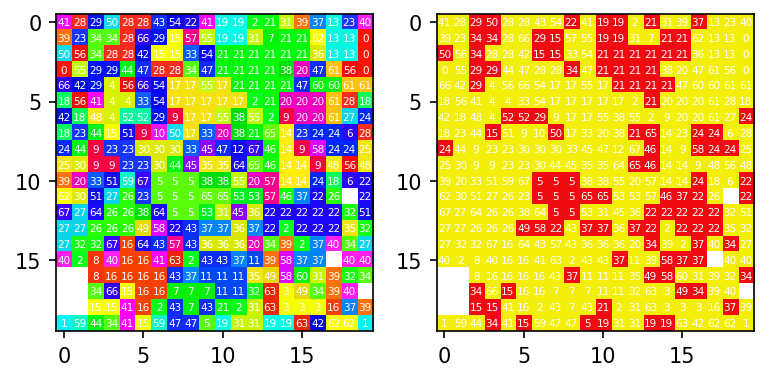

In [11]:
island.print_status(action=True)
island.land.plot()

In [23]:
import random

def decision(params, status):
  # function to make random decisions based on parameters and status
  if random.random() < params[0]:
    return 'attack'
  else:
    return 'help'

def update_status(a, b, decision_a, decision_b):
  # function to update the status of two agents based on their decisions
  if decision_a == 'attack':
    b -= 1
  if decision_b == 'attack':
    a -= 1
  return a, b

def reproduce(params_a, params_b):
  # function to produce new parameters for the offspring
  return (params_a + params_b)/2

# Initialize population with random strategies and random status
population = [(random.random(), random.randint(1, 10)) for i in range(10)]

# simulate for 100 rounds
for i in range(100):
  next_generation = []
  for j in range(0, len(population), 2):
    # make decisions based on parameters and status
    decision_a = decision(*population[j])
    decision_b = decision(*population[j+1])
    # update status based on decisions
    population[j] = update_status(*population[j], decision_a, decision_b)
    population[j+1] = update_status(*population[j+1], decision_b, decision_a)
    # generate offspring
    offspring_params = reproduce(population[j][0], population[j+1][0])
    next_generation.append((offspring_params, (population[j][1] + population[j+1][1])/2))
  population = next_generation


TypeError: 'float' object is not subscriptable

In [18]:
mem11 = island.current_members[1]

In [11]:
def print_sur_id(mem_list):
    sur_id = [mem.surviver_id for mem in mem_list]
    print(sur_id)

def get_pos(mem_list):
    pos = []
    for mem in mem_list:
        for p in mem.owned_land:
            pos.append(p)
    return pos

def assign_color(rgb_map, pos_list, rgb_color):
    """
    rgb_map has shape (land_x, land_y, 3)
    """
    for pos in pos_list:
        rgb_map[pos + (slice(None),)] = rgb_color
    
    return rgb_map

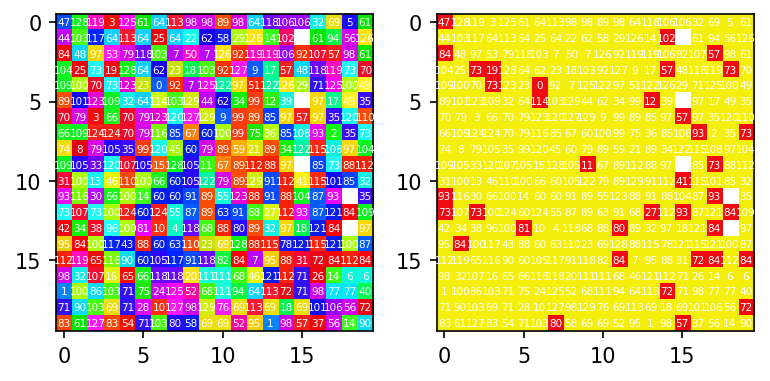

In [16]:
island.land.plot()

island._get_neighbors(mem11)
# print_sur_id(mem11.current_clear_list)
# print(mem11.current_empty_loc_list)
if mem11.current_neighbor_blocked_list != []:
    _, neibor_block = zip(*mem11.current_neighbor_blocked_list)
    print_sur_id(neibor_block)
# print_sur_id(mem11.current_self_blocked_list)

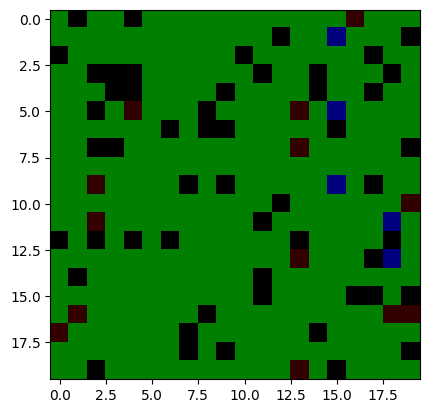

In [19]:
rgb_map = np.zeros((island.land.shape + (3,)))

rgb_map = assign_color(rgb_map, mem11.owned_land, np.array(mem11._color) / 256)
rgb_map = assign_color(rgb_map, get_pos(mem11.current_clear_list), [0.0, 0.5, 0])
rgb_map = assign_color(rgb_map, get_pos(mem11.current_self_blocked_list), [0.5, 0.0, 0])
if mem11.current_neighbor_blocked_list != []:
    rgb_map = assign_color(rgb_map, get_pos(neibor_block), [0.2, 0.0, 0])
rgb_map = assign_color(rgb_map, mem11.current_empty_loc_list, [0, 0, 0.5])


plt.imshow(rgb_map)
plt.show()

In [46]:
mem11.current_neighbor_blocked_list

[(Davena(206), Evelia(294)),
 (Zoraida(275), Evelia(294)),
 (Len(231), Evelia(294)),
 (Kong(254), Aleka(296)),
 (Norma(269), Aleka(296)),
 (Taheerah(246), Aleka(296)),
 (Jecory(267), Evelia(294)),
 (Drew(72), Evelia(294)),
 (Angella(282), Evelia(294)),
 (Dominik(260), Evelia(294)),
 (Iyona(288), Aleka(296)),
 (Sameul(261), Aleka(296)),
 (Benjain(253), Aleka(296)),
 (Amjad(214), Aleka(296)),
 (Javonte(234), Aleka(296)),
 (Javonte(234), Evelia(294)),
 (Kjersten(51), Evelia(294)),
 (Minette(162), Aleka(296)),
 (Ruthy(293), Evelia(294)),
 (Drew(72), Aleka(296)),
 (Terriann(291), Aleka(296)),
 (Aarn(280), Aleka(296)),
 (Zoraida(275), Aleka(296))]

In [53]:
ana = Analyzer(island)
ana.clear_graph()

In [54]:
island.current_members

[Anastassia(26),
 Chenoa(37),
 Kjersten(51),
 Shirita(58),
 Song(63),
 Drew(72),
 Phoenicia(106),
 Edelmiro(122),
 Mrk(131),
 Tavon(145),
 Lavina(147),
 Shaneaka(161),
 Minette(162),
 Ramie(201),
 Davena(206),
 Jaffar(207),
 Amjad(214),
 Edrick(224),
 Janiqua(225),
 Marlow(229),
 Len(231),
 Javonte(234),
 Stefania(238),
 Taheerah(246),
 Yee(248),
 Kineta(250),
 Benjain(253),
 Kong(254),
 Chandelle(255),
 Ji(257),
 Errick(258),
 Dominik(260),
 Sameul(261),
 Shenika(262),
 Mareesa(263),
 Ronald(264),
 Daphne(265),
 Alysa(266),
 Jecory(267),
 Shannan(268),
 Norma(269),
 Abdulaziz(270),
 Kayvon(271),
 Antwaine(272),
 Shanne(273),
 Weldon(274),
 Zoraida(275),
 Jevon(276),
 Willam(277),
 Aaran(278),
 Rattana(279),
 Aarn(280),
 Can(281),
 Angella(282),
 Aadil(283),
 Chalon(284),
 Everson(285),
 Rindi(286),
 Sherrika(287),
 Iyona(288),
 Jace(289),
 Sevag(290),
 Terriann(291),
 Kailani(292),
 Ruthy(293),
 Evelia(294),
 Sioban(295),
 Aleka(296)]

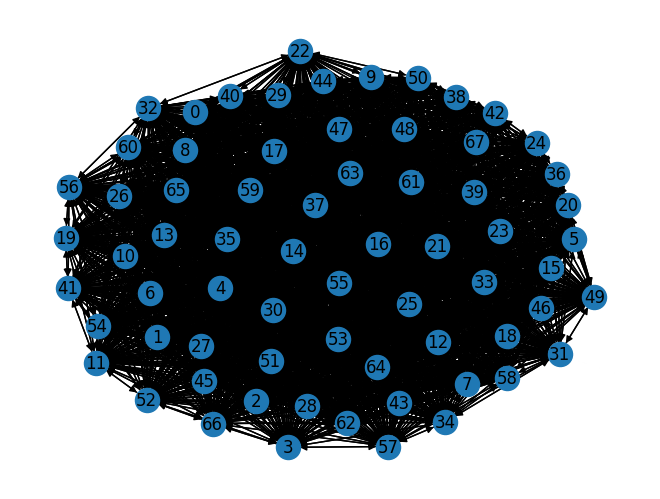

In [55]:
nx.draw(ana.clear_graph, with_labels=True)
plt.show()

In [56]:
island.all_members[2].surviver_id

In [57]:
island.new_round()
island.consume()
island.print_status()


##################### 21 #####################
本轮出生：[]
本轮死亡：[]
本轮总给予：0.0
本轮总攻击：0.0
本轮总产量：0.0
本轮总消耗：1044.8
	 ID Sur_ID  姓名          年龄   血量    仓库    土地数
	[26, 0] Anastassia:   67,   33.0,   0.0   4(1.0%)
	[37, 1] Chenoa:       46,   25.9,   0.0   2(0.5%)
	[51, 2] Kjersten:     69,   33.2,   0.0   9(2.2%)
	[58, 3] Shirita:      38,   31.3,   0.0   4(1.0%)
	[63, 4] Song:         46,   38.3,   0.0   4(1.0%)
	[72, 5] Drew:         36,   42.2,   0.0   9(2.2%)
	[106, 6] Phoenicia:    50,   42.9,   0.0   2(0.5%)
	[122, 7] Edelmiro:     38,   33.1,   0.0   5(1.2%)
	[131, 8] Mrk:          59,   21.8,   0.0   2(0.5%)
	[145, 9] Tavon:        31,   33.2,   0.0   8(2.0%)
	[147, 10] Lavina:       49,   21.0,   0.0   1(0.2%)
	[161, 11] Shaneaka:     65,   38.6,   0.0   6(1.5%)
	[162, 12] Minette:      48,   20.3,   0.0   1(0.2%)
	[201, 13] Ramie:        19,   46.3,   0.0   5(1.2%)
	[206, 14] Davena:       19,   47.1,   0.0   6(1.5%)
	[207, 15] Jaffar:       19,   43.8,   0.0   8(2.0%)
	[214, 16] Amjad

In [58]:
morgen = island.member_by_name("Morgen")

In [59]:
island._get_neighbors(morgen)

In [60]:
morgen.current_empty_loc_list

[]

In [61]:
boy.owned_land

NameError: name 'boy' is not defined

In [62]:
island._discard_land(marv, (1, 1))

NameError: name 'marv' is not defined

In [63]:
island.land

array([[Abdulaziz(270), Chandelle(255), Ji(257), Rattana(279),
        Chandelle(255), Chandelle(255), Antwaine(272), Aadil(283),
        Stefania(238), Abdulaziz(270), Marlow(229), Marlow(229),
        Kjersten(51), Javonte(234), Dominik(260), Shannan(268),
        Alysa(266), Ramie(201), Taheerah(246), Norma(269)],
       [Shannan(268), Taheerah(246), Mareesa(263), Mareesa(263),
        Chandelle(255), Sioban(295), Ji(257), Jaffar(207), Rindi(286),
        Chalon(284), Marlow(229), Marlow(229), Dominik(260),
        Edelmiro(122), Javonte(234), Javonte(234), Terriann(291),
        Ramie(201), Ramie(201), Anastassia(26)],
       [Rattana(279), Everson(285), Mareesa(263), Chandelle(255),
        Chandelle(255), Kayvon(271), Jaffar(207), Jaffar(207),
        Shenika(262), Aadil(283), Javonte(234), Javonte(234),
        Javonte(234), Javonte(234), Javonte(234), Javonte(234),
        Daphne(265), Ramie(201), Ramie(201), Anastassia(26)],
       [Anastassia(26), Chalon(284), Ji(257), Ji(257

In [67]:
rng.choice(range(10), 3, replace=False)

array([7, 8, 1])

In [68]:
m1 = Member("1", id=1, surviver_id=0, rng=rng)
m2 = Member("2", id=2, surviver_id=0, rng=rng)
m3 = Member("3", id=3, surviver_id=0, rng=rng)
m4 = Member("4", id=4, surviver_id=0, rng=rng)
m5 = Member("5", id=5, surviver_id=0, rng=rng)
m6 = Member("6", id=6, surviver_id=0, rng=rng)
m7 = Member("7", id=7, surviver_id=0, rng=rng)
m8 = Member("8", id=8, surviver_id=0, rng=rng)

In [69]:
land = Land((6, 5))
land.owner = [
    [None, m1, m1, None, m1],
    [m1, m1, m3, m5, m5],
    [m6, m6, m4, m4, m1],
    [m7, m1, None, m1, m1],
    [m1, m1, m1, m1, m1],
    [m4, m8, m2, m1, m1],
]

In [70]:
clear_list = []
self_blocked_list = []
neighbor_blocked_list = []
empty_loc_list = []

is_passed = np.zeros((6, 5))

land._find_neighbors(
    clear_list,
    self_blocked_list,
    neighbor_blocked_list,
    empty_loc_list,
    location = (2, 2),
    member = m4,
    is_passed = is_passed,
    iteration_cnt = 0,
    island = None
)

print(is_passed)
print(clear_list)
print(self_blocked_list)
print(neighbor_blocked_list)

land._find_neighbors(
    clear_list,
    self_blocked_list,
    neighbor_blocked_list,
    empty_loc_list,
    location = (5, 0),
    member = m4,
    is_passed = is_passed,
    iteration_cnt = 0,
    island = None
)

print(is_passed)
print(clear_list)
print(self_blocked_list)
print(neighbor_blocked_list)
print(empty_loc_list)

TypeError: Land._find_neighbors() missing 1 required positional argument: 'max_iter'

In [ ]:
1 == True

True

In [ ]:
os.mkdir("test1/0/")

In [ ]:
island = Island(50, random_seed=2022)

In [ ]:
island.fight()
island.trade()

In [ ]:
island.save_current_island("test_")

In [ ]:
x.save_to_row()

attack
offer
reproduce


,name,surviver_id,productivity,vitality,cargo,age,attack_self_productivity,attack_self_vitality,attack_self_cargo,attack_self_age,...,reproduce_obj_productivity,reproduce_obj_vitality,reproduce_obj_cargo,reproduce_obj_age,reproduce_victim_overlap,reproduce_benefit_overlap,reproduce_victim_passive,reproduce_victim_active,reproduce_benefit_passive,reproduce_benefit_active
0,Marvell,0,14.493567,26.657547,37.384384,89,0.054261,0.695186,0.868202,0.0,...,0.270527,0.620712,0.270702,0.0,0.738614,0.408641,-0.314751,-0.615778,0.949761,0.262216


In [ ]:
island.new_round()

In [ ]:
island.produce()

In [ ]:
island.fight()

In [ ]:
island.consume()

In [ ]:
island.relationship_dict["benefit"][26, 18]

In [ ]:
island.trade()

In [ ]:
island.trade()
island.print_info()

In [ ]:
island.relationship_dict["benefit"][1, 48]

In [ ]:
island.new_round()

In [ ]:
for mem in groups[0]:
    for obj in groups[0]:
        if mem is not obj:
            print(mem, obj, mem.decision("fight", obj, island))


In [ ]:
member1 = island.all_members[0]
member2 = island.all_members[1]

In [ ]:
member1.fight_parameter

In [ ]:
member1.fight_parameter[0] = 0
member1.parameter_dict["fight"]

In [ ]:
inputs = list(member1._generate_decision_inputs(member2, island).values())
member1._decision(member1.fight_parameter, inputs)

In [ ]:
range(1, 10)

In [ ]:
Member.born(island.all_members[0], island.all_members[1])

In [ ]:
a = [1, 2, 3, 4]
np.repeat(a, 2)

In [ ]:
a = ["a", "b"]
b = [np.random.rand(2), np.random.rand(2)]
d = dict(zip(a, b))
d

In [ ]:
n = {key: d[key] for key in d.keys()}
n

In [ ]:
class foo:
    def __init__(self, a):
        self.a = a

    @property
    def return_a(self):
        return self.a * 2

In [ ]:
x = foo(1)
x.return_a

In [ ]:
island = Island(42, random_seed=2022)
island.fight()

In [ ]:
# seed = time()
rng = np.random.default_rng(2022)

In [ ]:
rng.random(1)

In [ ]:
def f(x: np.ndarray):
    print(x)

In [ ]:
(np.array([None, 1]) == None).any()

In [ ]:
b = np.array([[0], [1]])
c = np.array([[10], [100]])
a = [b, c]
a

In [ ]:
for idx in range(len(a)):
    a[idx].resize(1, refcheck=False)

a

In [ ]:
b

In [ ]:
island = Island(4)
print(island.victim_memory)
np.fill_diagonal(island.victim_memory, np.nan)
print(island.victim_memory)


In [ ]:
somebody_die = [island.current_members[3], island.current_members[2]]

In [ ]:
somebody_born = [Member("aha", 1, None), Member("aha", 99, None)]

In [ ]:
print(island.all_members)
print(island.current_members)
print(island.victim_memory)
print(island.benefit_memory)

In [ ]:
island.member_list_modify(somebody_born, somebody_die, np.zeros((2, 4)), np.zeros((4, 2)))
print(island.all_members)
print(island.current_members)
print(island.current_member_num)
print(island.victim_memory)
print(island.benefit_memory)
print(island.current_members[-1].surviver_id)
print(island.all_members[-1].surviver_id)
print(island.all_members[-1].id)

In [ ]:
a = np.random.rand(5, 5)
a

In [ ]:
a = np.delete(a, (1, 2), axis=0)
a = np.delete(a, (1, 2), axis=1)
a

In [ ]:
a = np.delete(a, (1), axis=1)
a

In [ ]:
b = a[0]
b

In [ ]:
np.sort(b)[::-1]

In [ ]:
island = Island(10)
print(island.all_members)


In [ ]:
island.all_members
print(island.current_members)

In [ ]:
island.all_members[0].name = "aaaaa"
print(island.all_members)
print(island.current_members)

In [ ]:
np.random.seed(1)
x = np.random.random(10)
print(x)
print(np.random.normal(x[0], 1, 10))

In [ ]:
a = [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
a.append([[9, 0], [1, 2]])
arr = np.array(a)
arr.reshape(3, 4)

In [ ]:
arr.reshape(3, 2, 2)

In [ ]:
pd.DataFrame([[1,2,3],[4,5,6]], index=['a','b'], columns=["g", 'h', 'j'])

In [ ]:
a = ["a", "b", "c"]
np.random.shuffle(a)
a

In [ ]:
a = np.array([0, 1, 2, 3])
b = [True, False, True, False]
a[b]

In [ ]:
plt.plot([1 ,2 ,3], [1, 2, None])

In [ ]:
print(plt.cm.RdYlGn)

In [ ]:
list = np.array([1, 2, 3 ,4, 5])
list[list < 3] = 0
list

In [ ]:
list = ['iarry', 'harry', 'hbrry']
arg_sort_list = np.argsort(list)
arg_sort_list

In [ ]:
list = [list[i] for i in arg_sort_list]
list

In [ ]:
np.split((np.arange(10)), 2)

In [ ]:
mat = np.random.rand(3, 3)
mat = [[1, 2, 3], [2, 0, 4], [1, 2, 1]]
mat

In [ ]:
max_mat_element = np.argmax(np.sum(mat, 1))
max_mat_element

In [ ]:
class test_class:
    def __init__(self):
        self.att = 1

def change(cl):
    cl.att = 2

a = test_class()
change(a)
a.att

In [ ]:
str = ""
str == ""

In [ ]:
np.random.choice([1, 2, 3], size=1, p = [1, 2, 3])